# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import random,math
# This might be helpful:
from collections import Counter

## Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
df_hh_income = pd.read_csv('fatal_force_data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('fatal_force_data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('fatal_force_data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('fatal_force_data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('fatal_force_data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"Median Household Income:{df_hh_income.shape}\nPCT People Below Poverty Level:{df_pct_poverty.shape}\nPCT Over 25 Completed High School:{df_pct_completed_hs.shape}\nShare of Race By City:{df_share_race_city.shape}\nDeaths by Police US:{df_fatalities.shape}")

Median Household Income:(29322, 3)
PCT People Below Poverty Level:(29329, 3)
PCT Over 25 Completed High School:(29329, 3)
Share of Race By City:(29268, 7)
Deaths by Police US:(2535, 14)


In [ ]:
print(f"Median Household Income:Column-{df_hh_income.shape[1]} Row-{df_hh_income.shape[0]}\nPCT People Below Poverty Level:Column-{df_pct_poverty.shape[1]} Row-{df_pct_poverty.shape[0]}\nPCT Over 25 Completed High School:Column-{df_pct_completed_hs.shape[1]}Row-{df_pct_completed_hs.shape[0]}\nShare of Race By City:Column-{df_share_race_city.shape[1]} Row-{df_share_race_city.shape[0]}\nDeaths by Police US:Column-{df_fatalities.shape[1]} Row-{df_fatalities.shape[0]}")

Median Household Income:Column-3 Row-29322
PCT People Below Poverty Level:Column-3 Row-29329
PCT Over 25 Completed High School:Column-3Row-29329
Share of Race By City:Column-7 Row-29268
Deaths by Police US:Column-14 Row-2535


In [ ]:
def data_columns(file_name):
  for col in file_name.columns:
    print(col)
  print(f"Nan Values:{file_name.isnull().sum()} Duplicates:{file_name.duplicated().sum()}")
  print("---")
print("Median Household Income:")
data_columns(df_hh_income)
print("PCT People Below Poverty Level:")
data_columns(df_pct_poverty)
print("PCT Over 25 Completed High School:")
data_columns(df_pct_completed_hs)
print("Share of Race By City:")
data_columns(df_share_race_city)
print("Deaths by Police US:")
data_columns(df_fatalities)


Median Household Income:
Geographic Area
City
Median Income
Nan Values:Geographic Area     0
City                0
Median Income      51
dtype: int64 Duplicates:0
---
PCT People Below Poverty Level:
Geographic Area
City
poverty_rate
Nan Values:Geographic Area    0
City               0
poverty_rate       0
dtype: int64 Duplicates:0
---
PCT Over 25 Completed High School:
Geographic Area
City
percent_completed_hs
Nan Values:Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64 Duplicates:0
---
Share of Race By City:
Geographic area
City
share_white
share_black
share_native_american
share_asian
share_hispanic
Nan Values:Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64 Duplicates:0
---
Deaths by Police US:
id
name
date
manner_of_death
armed
age
gender
race
city
state
signs_of_mental_illness
threat_level


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.fillna(0)
df_fatalities.fillna(0)
df_pct_poverty.fillna(0)
df_pct_completed_hs.fillna(0)
df_share_race_city.fillna(0)
df_fatalities.fillna(0)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

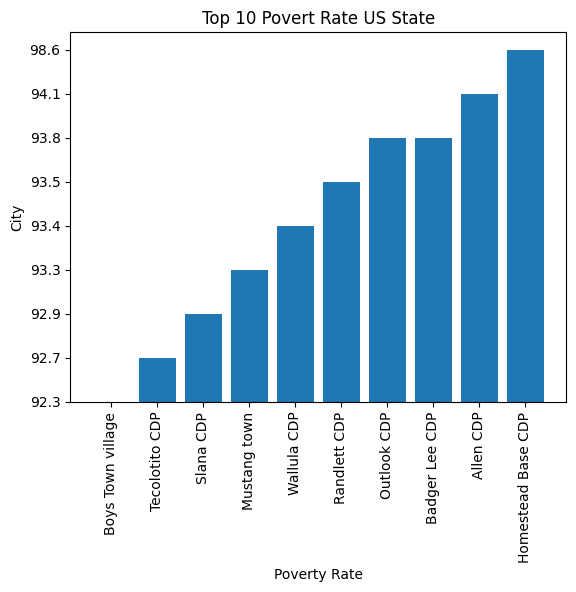

<Figure size 2000x1500 with 0 Axes>

In [68]:
df_pct_poverty_sorted=df_pct_poverty.sort_values(by='poverty_rate',ascending=False)
poverty=[]
state=[]
for i in range(10):
  poverty.append(df_pct_poverty_sorted['poverty_rate'].iloc[i])
  state.append(df_pct_poverty_sorted['City'].iloc[i])
poverty=poverty[::-1]
state=state[::-1]
plt.title('Top 10 Povert Rate US State')
plt.bar(state,poverty)
plt.xlabel('Poverty Rate')
plt.ylabel('City')
plt.xticks(state,rotation='vertical')
plt.figure(figsize=(20,15))
plt.show()

In [ ]:
print(f"Min Value of State: {df_pct_poverty_sorted.iloc[-1]['City']}")
print(f"Max Value: {df_pct_poverty_sorted.iloc[0]['City']}")


Min Value of State: University of Pittsburgh Johnstown CDP
Max Value: Homestead Base CDP


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [70]:
df_pct_completed_hs_sorted=df_pct_completed_hs.sort_values(by='percent_completed_hs',ascending=True)
print(df_pct_completed_hs_sorted)
print(df_pct_completed_hs_sorted.iloc[0]['City'])
print(df_pct_completed_hs_sorted.iloc[-1]['City'])


      Geographic Area                  City percent_completed_hs
14024              MO             Goss town                    -
770                AK            Loring CDP                    -
14570              MO      Tarrants village                    -
1113               AZ      Hunter Creek CDP                    -
16280              NJ       Ross Corner CDP                    -
...               ...                   ...                  ...
7176               IL         Scott AFB CDP                 99.8
26212              TX  West Lake Hills city                 99.8
23070              PA          Toftrees CDP                 99.8
25983              TX          Serenada CDP                 99.9
5731               HI   Kaneohe Station CDP                 99.9

[29329 rows x 3 columns]
Goss town
Kaneohe Station CDP


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

['98.6', '94.1', '93.8', '93.8', '93.5', '93.4', '93.3', '92.9', '92.7', '92.3']


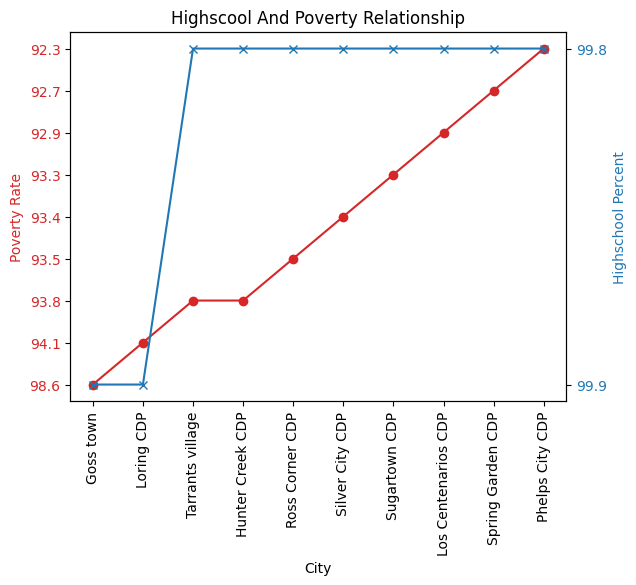

In [71]:
df_pct_poverty_sorted=df_pct_poverty.sort_values(by='poverty_rate',ascending=False)
df_pct_hs_sorted=df_pct_completed_hs.sort_values(by='percent_completed_hs',ascending=False)
poverty_rate=[]
hs_rate=[]
state=[]

for i in range (10):
  poverty_rate.append(df_pct_poverty_sorted['poverty_rate'].iloc[i])
  hs_rate.append(df_pct_hs_sorted['percent_completed_hs'].iloc[i])
  state.append(df_pct_completed_hs_sorted['City'].iloc[i])

print(poverty_rate)

fig,ax1=plt.subplots()
ax1.set_xlabel('City')
ax1.set_ylabel('Poverty Rate',color='tab:red')
ax1.plot(state,poverty_rate,color='tab:red',marker='o')
ax1.tick_params(axis='y',labelcolor='tab:red')
plt.xticks(state,rotation=90)
ax2=ax1.twinx()
ax2.set_ylabel('Highschool Percent',color='tab:blue')
ax2.plot(state,hs_rate,color='tab:blue',marker='x')
ax2.tick_params(axis='y',labelcolor='tab:blue')
plt.title('Highscool And Poverty Relationship')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

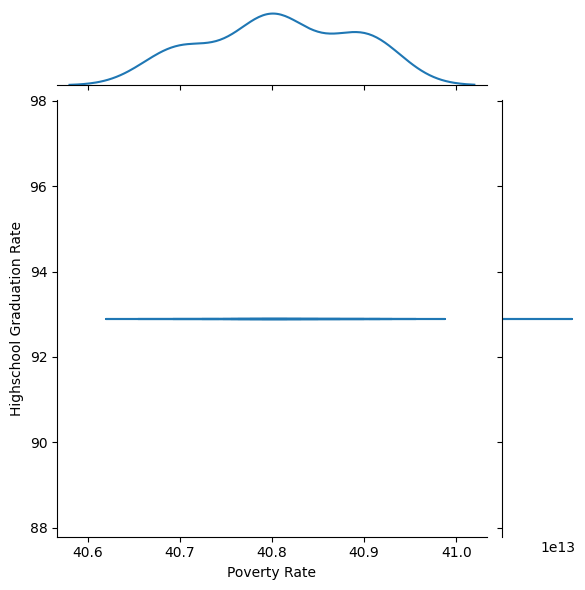

In [8]:
int_poverty_rate=list(map(float,poverty_rate))
int_hs_rate=list(map(float,hs_rate))
seaborn_data=pd.DataFrame({'Poverty Rate':int_poverty_rate,'Highschool Graduation Rate':int_hs_rate})
sns.jointplot(data=seaborn_data,x='Poverty Rate',y='Highschool Graduation Rate', kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

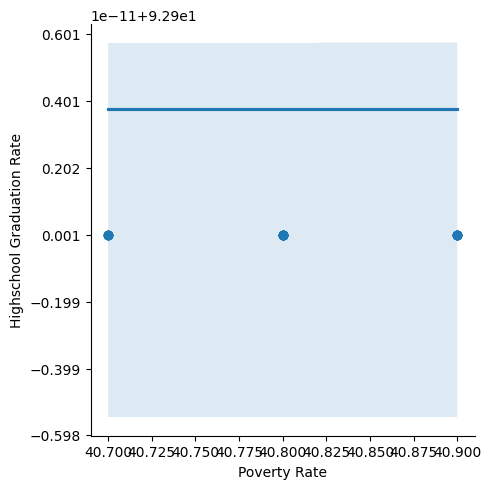

In [9]:
sns.lmplot(data=seaborn_data,x="Poverty Rate",y="Highschool Graduation Rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

['0', '0', '1.6', '30.2', '67.2']


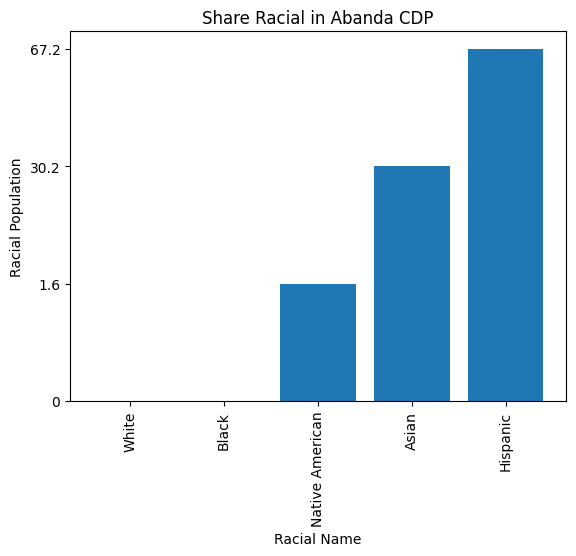

<Figure size 2000x1500 with 0 Axes>

In [ ]:
race=df_share_race_city.iloc[0]
racial=[race['share_white'],race['share_black'],race['share_native_american'],race['share_asian'],race['share_hispanic']]
racial.sort(reverse=False)
racial_name=['White','Black','Native American','Asian','Hispanic']
plt.title('Share Racial in Abanda CDP')
plt.bar(racial_name,racial)
plt.xlabel('Racial Name')
plt.ylabel('Racial Population')
plt.xticks(racial_name,rotation='vertical')
plt.figure(figsize=(20,15))
plt.show()



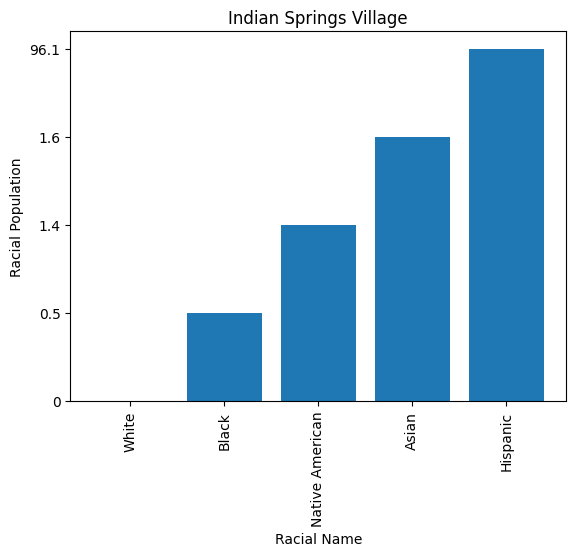

<Figure size 2000x1500 with 0 Axes>

In [ ]:
race=df_share_race_city.iloc[275]
racial=[race['share_white'],race['share_black'],race['share_native_american'],race['share_asian'],race['share_hispanic']]
racial.sort(reverse=False)
racial_name=['White','Black','Native American','Asian','Hispanic']
plt.title('Indian Springs Village')
plt.bar(racial_name,racial)
plt.xlabel('Racial Name')
plt.ylabel('Racial Population')
plt.xticks(racial_name,rotation='vertical')
plt.figure(figsize=(20,15))
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [95]:
death_race_dict=df_fatalities['race'].value_counts().to_dict()
death_races=list(death_race_dict.keys())
death_race_amounts=list(death_race_dict.values())
print(death_race_amounts)

[1201, 618, 423, 39, 31, 28]


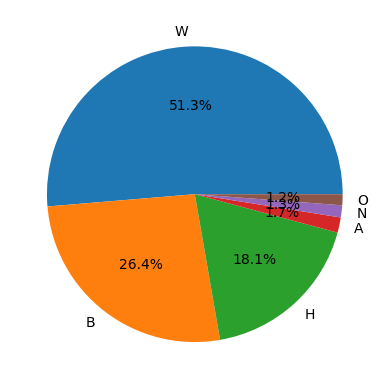

In [100]:
plt.pie(death_race_amounts,labels=death_races, autopct='%1.1f%%')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

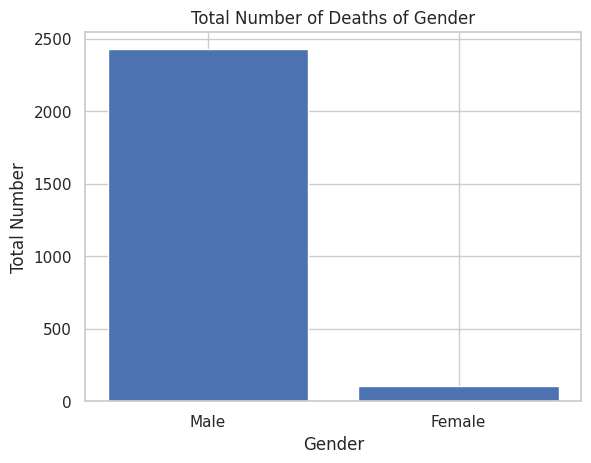

<Figure size 2000x1500 with 0 Axes>

In [73]:
gender=df_fatalities['gender']
male=0
female=0
for i in range(2535):
  if gender.iloc[i]=='M':
    male+=1
  if gender.iloc[i]=='F':
    female+=1
total_gender=[male,female]
gender_name=['Male','Female']
plt.title('Total Number of Deaths of Gender')
plt.bar(gender_name,total_gender)
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.figure(figsize=(20,15))
plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [12]:
male_mannerofdeath=[]
female_mannerofdeath=[]
for i in range(2535):
  if df_fatalities.iloc[i]['gender']=='M':
    male_mannerofdeath.append(df_fatalities.iloc[i]['manner_of_death'])
  if df_fatalities.iloc[i]['gender']=='F':
    female_mannerofdeath.append(df_fatalities.iloc[i]['manner_of_death'])

In [32]:
male_percent=[male_mannerofdeath.count('shot')/(len(male_mannerofdeath)+len(female_mannerofdeath)),
              male_mannerofdeath.count('shot and Tasered')/(len(male_mannerofdeath)+len(female_mannerofdeath))]
female_percent=[female_mannerofdeath.count('shot')/(len(male_mannerofdeath)+len(female_mannerofdeath)),
              female_mannerofdeath.count('shot and Tasered')/(len(male_mannerofdeath)+len(female_mannerofdeath))]


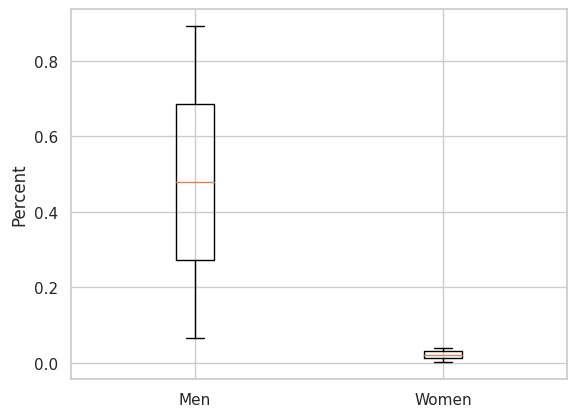

In [33]:
plt.boxplot([male_percent,female_percent],labels=['Men','Women'])
plt.ylabel('Percent')
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [74]:
unarmed_value=0
armed_value=0
for i in range(2535):
  if df_fatalities.iloc[i]['armed']=='unarmed':
    unarmed_value+=1
  else:
    armed_value+=1
print(f"Percenage of police killings were people armed: %{((unarmed_value/2536)*100):.2f}")

Percenage of police killings were people armed: %6.74


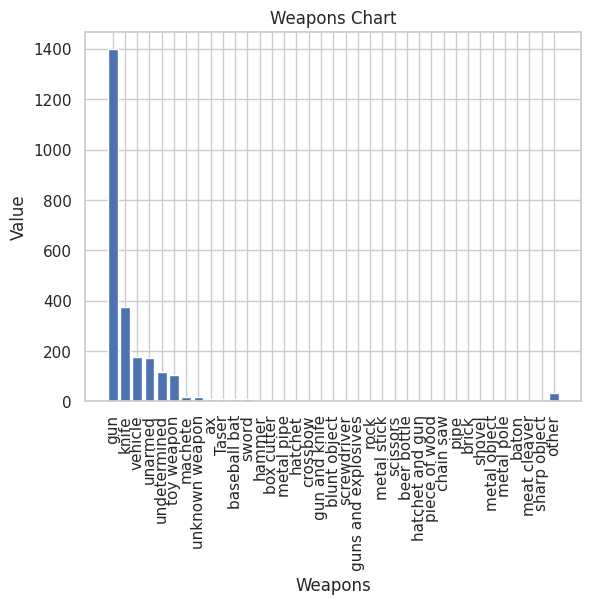

In [70]:
weapon_dict=df_fatalities['armed'].value_counts().to_dict()
weapons=list(weapon_dict.keys())
weapon_values=list(weapon_dict.values())
other_value=0
for i in range(68):
  if weapon_values[i]==1:
    other_value+=1
weapons=weapons[:36]
weapons.append('other')
weapon_values=weapon_values[:36]
weapon_values.append(32)
plt.title('Weapons Chart')
plt.xlabel('Weapons')
plt.ylabel('Value')
plt.bar(weapons,weapon_values)
plt.xticks(weapons,rotation='vertical')
plt.show()

In [71]:
print(f"Armed with Guns Value:{armed_value}\nUnarmed Value:{unarmed_value}")

Armed with Guns Value:2364
Unarmed Value:171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [75]:
under_25=0
for i in range(2535):
  if df_fatalities.iloc[i]['age']<25:
    under_25+=1
print(f"Percentage of People Killed Were Under 25 Years Old: %{((under_25/2536)*100):.2f}")

Percentage of People Killed Were Under 25 Years Old: %17.74


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

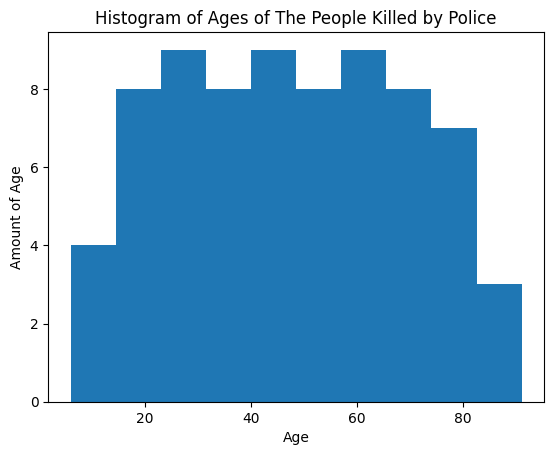

<Axes: ylabel='Density'>

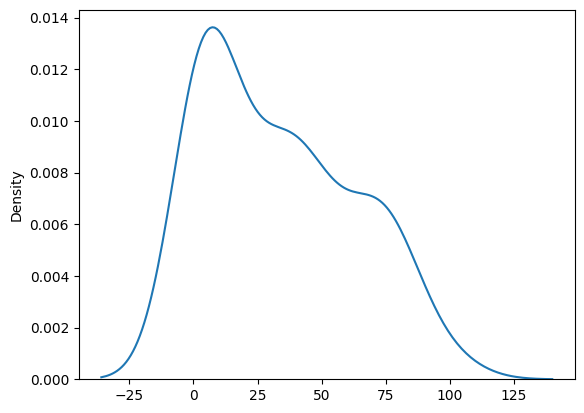

In [9]:
age_dict=df_fatalities['age'].value_counts().to_dict()
plt.hist(age_dict)
plt.title('Histogram of Ages of The People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Amount of Age')
plt.show()
sns.kdeplot(data=age_dict)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

<Axes: xlabel='Age', ylabel='Percent'>

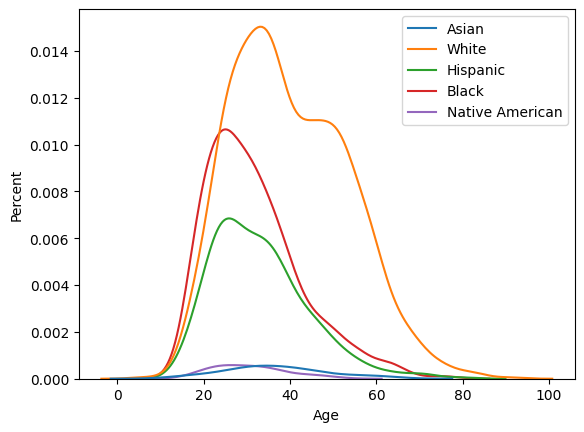

In [29]:
asian_age=[]
white_age=[]
hispanic_age=[]
black_age=[]
native_age=[]
for i in range(2535):
  if not math.isnan(df_fatalities.iloc[i]['age']):
    if df_fatalities.iloc[i]['race']=='A':
      asian_age.append(int(df_fatalities.iloc[i]['age']))

    elif df_fatalities.iloc[i]['race']=='W':
      white_age.append(int(df_fatalities.iloc[i]['age']))

    elif df_fatalities.iloc[i]['race']=='H':
      hispanic_age.append(int(df_fatalities.iloc[i]['age']))

    elif df_fatalities.iloc[i]['race']=='B':
      black_age.append(int(df_fatalities.iloc[i]['age']))

    elif df_fatalities.iloc[i]['race']=='N':
      native_age.append(int(df_fatalities.iloc[i]['age']))

kde_data={'Asian':asian_age,'White':white_age,'Hispanic':hispanic_age,'Black':black_age,
          'Native American':native_age}
plt.xlabel('Age')
plt.ylabel('Percent')
sns.kdeplot(data=kde_data)

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [33]:
killed_asian=0
killed_white=0
killed_black=0
killed_native=0
killed_hispanic=0
for i in range(2535):
  if df_fatalities.iloc[i]['race']=='A':
    killed_asian+=1
  elif df_fatalities.iloc[i]['race']=='W':
    killed_white+=1
  elif df_fatalities.iloc[i]['race']=='H':
    killed_hispanic+=1
  elif df_fatalities.iloc[i]['race']=='B':
    killed_black+=1
  elif df_fatalities.iloc[i]['race']=='N':
    killed_native+=1
race_list=['Asian','White','Hispanic','Black','Native American']
total_kill_list=[killed_asian,killed_white,killed_hispanic,killed_black,killed_native]

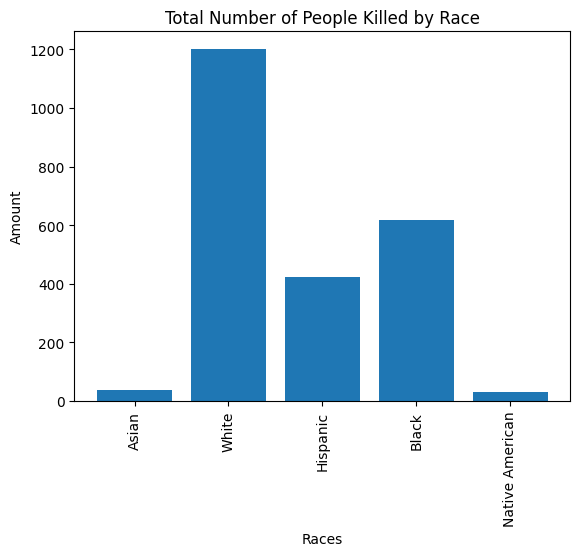

In [34]:
plt.title('Total Number of People Killed by Race')
plt.bar(race_list,total_kill_list)
plt.xlabel('Races')
plt.ylabel('Amount')
plt.xticks(race_list,rotation='vertical')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [37]:
mental_illness=0
for i in range(2535):
  if df_fatalities.iloc[i]['signs_of_mental_illness']:
    mental_illness+=1

In [38]:
print(f"Percentage of people killed by police with a mental illness: %{((mental_illness/2536)*100):.2f}")

Percentage of people killed by police with a mental illness: %24.96


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [53]:
all_cities=df_fatalities['city'].value_counts().to_dict()
top_10_cities=sorted(all_cities.items(),key=lambda x: x[1],reverse=True)
top_10_cities=top_10_cities[:10]
print(f'The Most Dangerous City: {top_10_cities[0][0]}')

The Most Dangerous City: Los Angeles


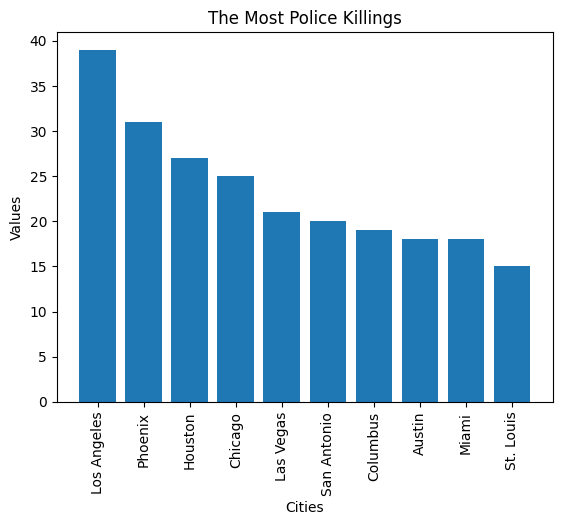

In [56]:
top_cities=[]
top_cities_value=[]
for i in range(10):
  top_cities.append(top_10_cities[i][0])
  top_cities_value.append(top_10_cities[i][1])
plt.title('The Most Police Killings')
plt.bar(top_cities,top_cities_value)
plt.xlabel('Cities')
plt.ylabel('Values')
plt.xticks(top_cities,rotation='vertical')
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [60]:
la_df=df_fatalities[df_fatalities['city']=='Los Angeles'].groupby(['city','race']).size().reset_index(name='total')
phnx_df=df_fatalities[df_fatalities['city']=='Phoenix'].groupby(['city','race']).size().reset_index(name='total')
chg_df=df_fatalities[df_fatalities['city']=='Chicago'].groupby(['city','race']).size().reset_index(name='total')
lv_df=df_fatalities[df_fatalities['city']=='Las Vegas'].groupby(['city','race']).size().reset_index(name='total')
sa_df=df_fatalities[df_fatalities['city']=='San Antonio'].groupby(['city','race']).size().reset_index(name='total')
au_df=df_fatalities[df_fatalities['city']=='Austin'].groupby(['city','race']).size().reset_index(name='total')
mi_df=df_fatalities[df_fatalities['city']=='Miami'].groupby(['city','race']).size().reset_index(name='total')
stl_df=df_fatalities[df_fatalities['city']=='St. Lois'].groupby(['city','race']).size().reset_index(name='total')


In [61]:
print(la_df)
print(phnx_df)
print(chg_df)
print(lv_df)
print(sa_df)
print(au_df)
print(mi_df)
print(stl_df)

          city race  total
0  Los Angeles    A      1
1  Los Angeles    B     10
2  Los Angeles    H     19
3  Los Angeles    W      6
      city race  total
0  Phoenix    B      2
1  Phoenix    H     11
2  Phoenix    N      3
3  Phoenix    W     12
      city race  total
0  Chicago    B     21
1  Chicago    H      1
2  Chicago    W      2
        city race  total
0  Las Vegas    B      3
1  Las Vegas    H      5
2  Las Vegas    W      9
          city race  total
0  San Antonio    B      3
1  San Antonio    H     12
2  San Antonio    W      3
     city race  total
0  Austin    B      3
1  Austin    H      2
2  Austin    W     13
    city race  total
0  Miami    B      8
1  Miami    H      6
2  Miami    W      3
Empty DataFrame
Columns: [city, race, total]
Index: []


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [72]:
all_states=df_fatalities['state'].value_counts().to_dict()
top_10_states=sorted(all_states.items(),key=lambda x: x[1],reverse=True)
top_10_states=top_10_states[:10]

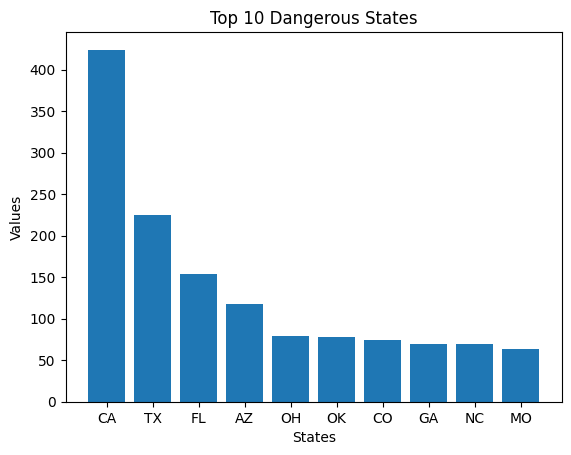

In [73]:
top_states=[]
top_states_value=[]
for i in range(10):
  top_states.append(top_10_states[i][0])
  top_states_value.append(top_10_states[i][1])
plt.title('Top 10 Dangerous States')
plt.bar(top_states,top_states_value)
plt.xlabel('States')
plt.ylabel('Values')
plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

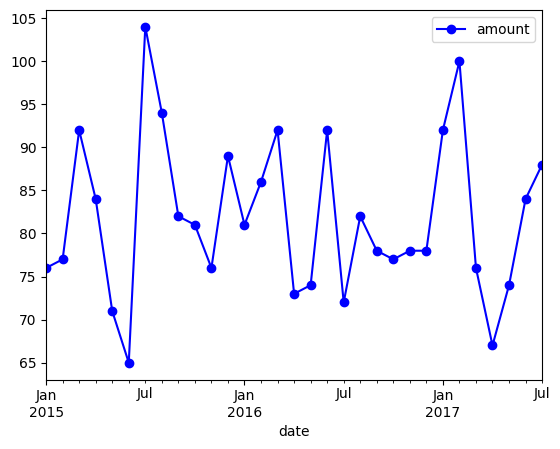

In [78]:
df_fatalities['date']=pd.to_datetime(df_fatalities['date'],format='%d/%m/%y')
kills_over_time=df_fatalities.groupby(df_fatalities['date'].dt.to_period("M")).size().reset_index(name='amount')
kills_over_time.plot(x='date',y='amount',kind='line', marker='o',linestyle='-',color='b')
plt.show()

In [81]:
max_index=kills_over_time['amount'].idxmax()
max_date=kills_over_time.loc[max_index,'date']
print(f'Date With the Most Kills {max_date}')

Date With the Most Kills 2015-07


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [84]:
print('Project is Done! github.com/akaomerr WAS HERE!!!')
print('For betta fish...<3')

Project is Done! github.com/akaomerr WAS HERE!!!
For betta fish...<3
